In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepn/Sample.csv
/kaggle/input/deepn/Train_Data.csv
/kaggle/input/deepn/Test_Data.csv


In [2]:
train = pd.read_csv('../input/deepn/Train_Data.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Identity               4061 non-null   int64  
 1   text                   4061 non-null   object 
 2   header                 4061 non-null   object 
 3   type_of_tweet          4061 non-null   object 
 4   screen_and_username    4061 non-null   object 
 5   num_followers          4061 non-null   object 
 6   num_friends            4061 non-null   object 
 7   num_retweets           4061 non-null   object 
 8   tweet_language         4061 non-null   object 
 9   rumour_identification  4061 non-null   object 
 10  Unnamed: 10            144 non-null    object 
 11  Unnamed: 11            14 non-null     object 
 12  Unnamed: 12            3 non-null      float64
dtypes: float64(1), int64(1), object(11)
memory usage: 412.6+ KB


In [4]:
train.head()

,Identity,text,header,type_of_tweet,screen_and_username,num_followers,num_friends,num_retweets,tweet_language,rumour_identification,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2617,Statement from St. Louis County Police Officer...,ferguson,1,Alex Heuer/alexheuer,1571,1463,465,en,1,NaN,NaN,NaN
1,5075,Australian radio reporting that #SydneySiege g...,sydneysiege,1,Jack Moore/JFXM,17860,6864,175,en,0,NaN,NaN,NaN
2,1293,#CharlieHebdo: Hundreds of Muslims gather outs...,charliehebdo,1,AFP Photo Department/AFPphoto,36919,242,815,en,1,NaN,NaN,NaN
3,5251,Authorities have confirmed that #sydneysiege i...,sydneysiege,1,Yahoo UK News/YahooNewsUK,36137,926,117,en,1,NaN,NaN,NaN
4,4850,#BREAKING One man has been arrested and people...,sydneysiege,1,ABC News 24/ABCNews24,169840,1421,264,en,0,NaN,NaN,NaN


In [5]:
k = 0
def shift1(x):
    if(x[9] == 'en'):
       print(1) 
       x = x.shift(periods=-1)
    return x
       

In [ ]:
test = train.apply(shift1)

In [ ]:
test['rumour_identification'].value_counts()

In [ ]:
test1 = train[train['rumour_identification'] == 'en'].shift(periods=-1,axis = 1)
idxx = train[train['rumour_identification'] == 'en']['Identity']
test1['text'] = test1['Identity'] + test1['text']
test1['Identity'] = idxx

In [ ]:
test1

In [ ]:
test2 = train[train['Unnamed: 10'] == 'en'].shift(periods=-2,axis = 1)
idxx = train[train['Unnamed: 10'] == 'en']['Identity']
textxx = train[train['Unnamed: 10'] == 'en']['text']
test2['text'] = textxx + test2['Identity'] + test2['text']
test2['Identity'] = idxx

In [ ]:
test2.iloc[0][1]

In [ ]:
test3 = train[train['Unnamed: 11'] == 'en'].shift(periods=-3,axis=1)
idxx = train[train['Unnamed: 11'] == 'en']['Identity']
textxx = train[train['Unnamed: 11'] == 'en']['text']
headxx = train[train['Unnamed: 11'] == 'en']['header']
test3['text'] = textxx+headxx + test3['Identity'] + test3['text']
test3['Identity'] = idxx

In [ ]:
train[train['Unnamed: 11'] == 'en']

In [ ]:
test3

In [ ]:
test2

In [ ]:
test1

In [ ]:
test = pd.concat([test1,test2,test3])
test

In [ ]:
indx= test.index()

In [ ]:
train.drop(indx, inplace = True)

In [ ]:
train = pd.concat([train,test])
train.drop(["Unnamed: 10","Unnamed: 11","Unnamed: 12"], axis = 1,inplace = True)

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.to_csv('clean_data1')

In [6]:
train['tweet_language'].value_counts()

en       3917
114         4
181         3
127         3
214         3
         ... 
129         1
113         1
330         1
38237       1
126         1
Name: tweet_language, Length: 121, dtype: int64

CAN DROP TWEET LANGUAGE

THE LSTM

In [120]:
import tensorflow as tf
import tensorflow
import keras
from keras import layers
from keras.layers import Input, Dense, LSTM, Concatenate
from keras import Sequential
from keras import Model
from keras.optimizers import Adam

In [79]:
no_words = 360
no_numerical_features = 3

In [148]:
lstm_in = layers.Input(shape=(no_words, 1))
lshidden1 = layers.LSTM(22)(lstm_in)
lstm_out = layers.Dense(22, activation='tanh')(lshidden1)
lstm_model = Model(inputs=lstm_in, outputs=lstm_out)
lstm_model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_84 (InputLayer)        [(None, 360, 1)]          0         
_________________________________________________________________
lstm_60 (LSTM)               (None, 22)                2112      
_________________________________________________________________
dense_174 (Dense)            (None, 22)                506       
Total params: 2,618
Trainable params: 2,618
Non-trainable params: 0
_________________________________________________________________


In [150]:
fnn_input = layers.Input(shape=(no_numerical_features))
x = layers.Concatenate()([lstm_out, fnn_input])
hidden1 = layers.Dense(128, activation="relu")(x)
hidden2 = layers.Dense(256, activation="relu")(hidden1)
hidden3 = layers.Dropout(0.6)(hidden2)
fnn_out = layers.Dense(2, activation="softmax")(hidden3)
model = Model(inputs=[lstm_out, fnn_input], outputs=fnn_out)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 360, 1), dtype=tf.float32, name='input_84'), name='input_84', description="created by layer 'input_84'") at layer "lstm_60". The following previous layers were accessed without issue: []

In [111]:
model.build(input_shape=(363, 1))

NotImplementedError: When subclassing the `Model` class, you should implement a `call` method.

In [139]:
import tensorflow as tf
import tensorflow
import keras
from keras import layers
from keras.layers import Input, Dense, LSTM, Concatenate
from keras import Sequential
from keras import Model
from keras.optimizers import Adam

no_words = 360
no_numerical_features = 3

lstm_input = Input(shape=(no_words, 1))
hidden1 = LSTM(22)(lstm_input)
hidden2 = Dense(22, activation='relu')(hidden1)
lstm_output = Dense(32, activation='tanh')(hidden2)
fnn_input=Input(shape=(no_numerical_features))
x = Concatenate()([lstm_output, fnn_input])
hidden_fnn1 = Dense(128, activation="relu")(x)
hidden_fnn2 = Dense(256, activation="relu")(hidden_fnn1)
dropout_fnn = layers.Dropout(0.6)(hidden_fnn2)
fnn_out = Dense(2, activation='sigmoid')(dropout_fnn)
model = Model(inputs=[lstm_input, fnn_input],outputs=fnn_out)

model.compile(loss='cel', optimizer='adam')
model.summary()
#model.fit([train_X_LSTM, train_X_MLP], train_y_LSTM, batch_size=64, epochs=10, validation_split=0.2)

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_77 (InputLayer)           [(None, 360, 1)]     0                                            
__________________________________________________________________________________________________
lstm_58 (LSTM)                  (None, 22)           2112        input_77[0][0]                   
__________________________________________________________________________________________________
dense_156 (Dense)               (None, 22)           506         lstm_58[0][0]                    
__________________________________________________________________________________________________
dense_157 (Dense)               (None, 32)           736         dense_156[0][0]                  
___________________________________________________________________________________________

In [140]:
model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_160')>

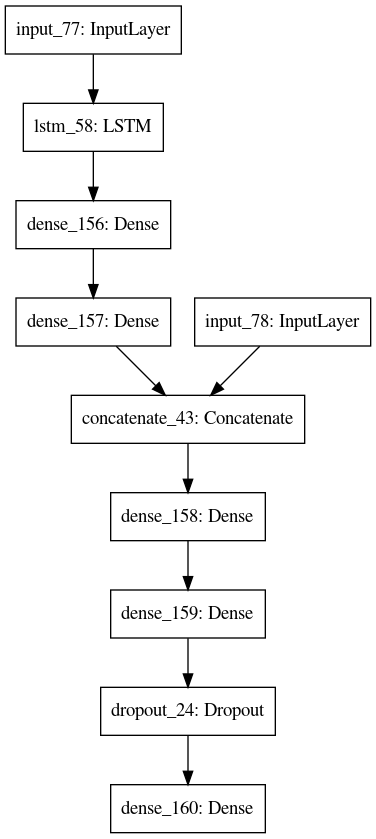

In [149]:
keras.utils.plot_model(model)

In [142]:
lstm_model.output

<KerasTensor: shape=(None, 22) dtype=float32 (created by layer 'dense_66')>

In [154]:
import tensorflow as tf
import tensorflow
import keras
from keras import layers
from keras.layers import Input, Dense, LSTM, Concatenate
from keras import Sequential
from keras import Model
from keras.optimizers import Adam

no_words = 360
no_numerical_features = 3
no_chars = 26

lstm_input = Input(shape=(no_words, 1))
hidden1 = LSTM(22)(lstm_input)
hidden2 = Dense(22, activation='relu')(hidden1)
lstm_output = Dense(32, activation='tanh')(hidden2)


lstm_input2 = Input(shape=(no_chars, 1))
hidden12 = LSTM(22)(lstm_input2)
hidden22 = Dense(22, activation='relu')(hidden12)
lstm_output2 = Dense(32, activation='tanh')(hidden22)


fnn_input=Input(shape=(no_numerical_features))
x = Concatenate()([lstm_output, fnn_input, lstm_output2])
hidden_fnn1 = Dense(128, activation="relu")(x)
hidden_fnn2 = Dense(256, activation="relu")(hidden_fnn1)
dropout_fnn = layers.Dropout(0.6)(hidden_fnn2)
fnn_out = Dense(2, activation='sigmoid')(dropout_fnn)
model = Model(inputs=[lstm_input, fnn_input, lstm_input2],outputs=fnn_out)

model.compile(loss='cel', optimizer='adam')
model.summary()
#model.fit([train_X_LSTM, train_X_MLP, train_X_LSTM_FOR_UNAME], train_y_LSTM, batch_size=64, epochs=10, validation_split=0.2)

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_93 (InputLayer)           [(None, 360, 1)]     0                                            
__________________________________________________________________________________________________
input_94 (InputLayer)           [(None, 26, 1)]      0                                            
__________________________________________________________________________________________________
lstm_66 (LSTM)                  (None, 22)           2112        input_93[0][0]                   
__________________________________________________________________________________________________
lstm_67 (LSTM)                  (None, 22)           2112        input_94[0][0]                   
___________________________________________________________________________________________

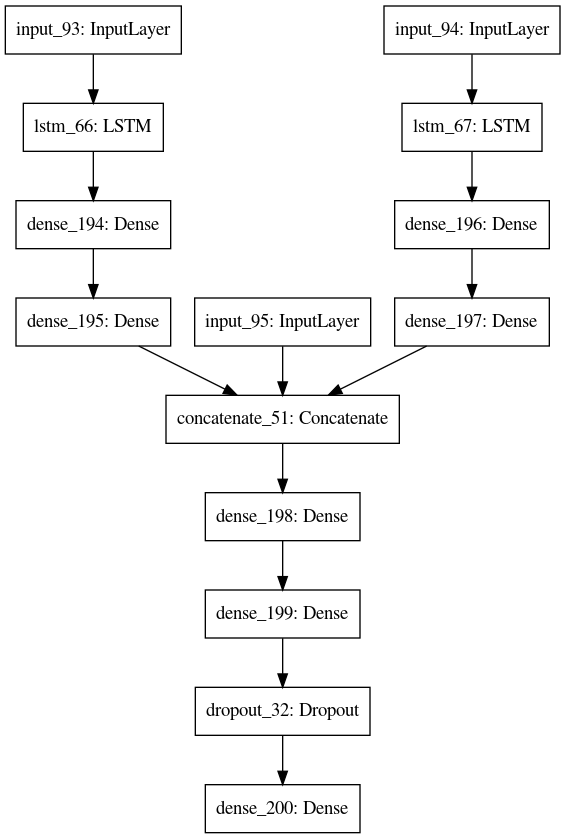

In [155]:
keras.utils.plot_model(model)